In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#load data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankData.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
#check for missing values
print("Missing values: \n",df.isnull().sum())
#cleaning data by handling duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Missing values: 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [21]:
#encode categorical data
Label_encorder={}
for col in df.columns:
  if df[col].dtype=="object":
    Label_encorder[col]=LabelEncoder()
    df[col]=Label_encorder[col].fit_transform(df[col])

In [22]:
#define feature and target
X=df.drop("y",axis=1)
y=df["y"]

#train , test and split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
#train the model
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
#prediction
y_pred=dt.predict(X_test)

In [30]:
#evaluation
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
#result
print("Accuracy: ",accuracy)
print("Classification Report: \n",report)




Accuracy:  0.8718232044198895
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



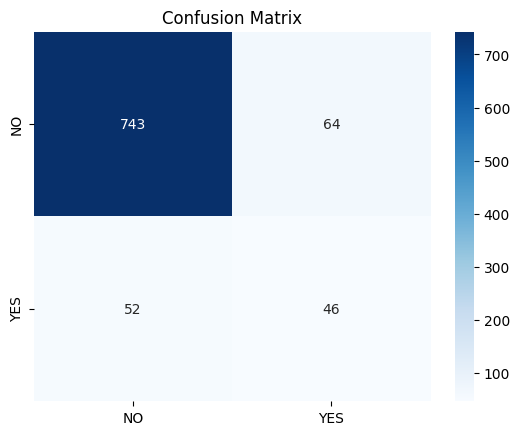

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["NO","YES"],yticklabels=["NO","YES"])
plt.title("Confusion Matrix")
plt.show()
